<a href="https://colab.research.google.com/github/pmukeshreddy/stock-predication-using-rnn/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
dataset_trainv = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/deeplearining projects/rnn/trainset.csv")

In [3]:
dataset_trainv

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900
...,...,...,...,...,...,...,...
1254,2017-12-22,1061.109985,1064.199951,1059.439941,1060.119995,1060.119995,755100
1255,2017-12-26,1058.069946,1060.119995,1050.199951,1056.739990,1056.739990,760600
1256,2017-12-27,1057.390015,1058.369995,1048.050049,1049.369995,1049.369995,1271900
1257,2017-12-28,1051.599976,1054.750000,1044.770020,1048.140015,1048.140015,837100


In [4]:
trainset = dataset_trainv.iloc[:,1:2].values

In [5]:
trainset

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [6]:
from sklearn.preprocessing  import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
trained_scaled = sc.fit_transform(trainset)

In [7]:
trained_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

In [8]:
x_train = []
y_train = []

In [9]:
import numpy as np

In [10]:
for i in range(60,1259):
  x_train.append(trained_scaled[i-60:i,0])
  y_train.append(trained_scaled[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)

In [11]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [12]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

In [13]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [16]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [17]:
model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 7s 20ms/step - loss: 0.0020
Epoch 2/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0019
Epoch 3/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0018
Epoch 4/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0018
Epoch 5/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0023
Epoch 6/100
38/38 [==============================] - 1s 19ms/step - loss: 0.0019
Epoch 7/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0020
Epoch 8/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0017
Epoch 9/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0016
Epoch 10/100
38/38 [==============================] - 1s 17ms/step - loss: 0.0016
Epoch 11/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0016
Epoch 12/100
38/38 [==============================] - 1s 18ms/step - loss: 0.0017
Epoch 13/100
38/38 [=====

In [18]:
dataset_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/deeplearining projects/rnn/testset.csv")

In [19]:
price = dataset_test.iloc[:,1:2].values

In [20]:
dataset_total = pd.concat((dataset_trainv["Open"],dataset_test["Open"]),axis=0)

In [21]:
ien = dataset_total[len(dataset_total)-len(dataset_test)-60:].values

In [22]:
len(dataset_total)-len(dataset_test)-60

1199

In [23]:
ien = ien.reshape(-1,1)

In [24]:
ien = sc.transform(ien)

In [25]:
ien.shape

(185, 1)

In [26]:
x_test = []

for i in range(60,185):
  x_test.append(ien[i-60:i,0])

In [27]:
x_test = np.array(x_test)

In [28]:
x_test.shape

(125, 60)

In [29]:
pred_on_test_set = model.predict(x_test)

4/4 [==============================] - 2s 10ms/step


In [30]:
pred_on_test_set = sc.inverse_transform(pred_on_test_set)

In [31]:
pred_on_test_set

array([[1042.6663],
       [1041.7406],
       [1045.4619],
       [1054.7786],
       [1063.4918],
       [1070.0198],
       [1074.9677],
       [1075.2986],
       [1075.7936],
       [1076.2296],
       [1082.705 ],
       [1088.3862],
       [1092.3496],
       [1094.8196],
       [1097.3037],
       [1103.302 ],
       [1111.8047],
       [1117.5659],
       [1120.6428],
       [1122.4764],
       [1122.4692],
       [1122.4432],
       [1121.8749],
       [1115.139 ],
       [1102.3418],
       [1080.3182],
       [1072.7241],
       [1070.573 ],
       [1060.8866],
       [1056.8656],
       [1056.6886],
       [1057.2104],
       [1063.1335],
       [1070.2345],
       [1074.5032],
       [1078.8005],
       [1083.5648],
       [1085.9641],
       [1089.3958],
       [1095.0076],
       [1096.3219],
       [1092.4791],
       [1077.9724],
       [1068.7618],
       [1072.0972],
       [1076.2473],
       [1083.0497],
       [1092.4224],
       [1103.9253],
       [1112.9227],


In [32]:
import matplotlib.pyplot as plt

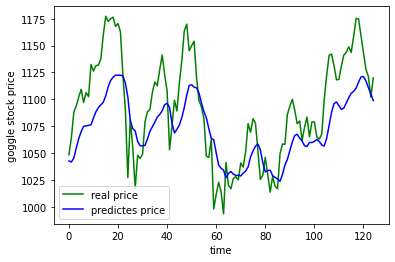

In [34]:
plt.plot(price,color="green",label="real price")
plt.plot(pred_on_test_set,color="blue",label="predictes price")
plt.xlabel("time")
plt.ylabel("goggle stock price")
plt.legend()